In [32]:
import os
import cv2
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Load the preprocessed images and corresponding labels
image_directory='C:\\Fetal_Brain\\CroppedImages'
labels_file = 'C:\\Fetal_Brain\\FETAL_PLANES_DB_data.xlsx'
# Read labels from Excel file
labels_df = pd.read_excel(labels_file)
labels_dict = dict(zip(labels_df['Image_name'], labels_df['Train ']))

# Prepare the data
images = []
labels = []
for filename in os.listdir(image_directory):
    image_path = os.path.join(image_directory, filename)
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)  # Read image in grayscale
    resized_image = cv2.resize(image, (224, 224))  
    images.append(resized_image.flatten()) 
    labels.append(labels_df.loc[labels_df['Image_name'] == filename.split(".")[0], 'Train '].values[0])


# Remove images with missing labels
images = np.array(images)
labels = np.array(labels)



ImportError: cannot import name 'RandomForestClassifier' from 'sklearn.tree' (c:\Users\itsoh\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\__init__.py)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Reshape the image data
X_train_rf = X_train.reshape(X_train.shape[0], -1)
X_test_rf = X_test.reshape(X_test.shape[0], -1)

# Flatten the image arrays for Random Forest input
X_train_rf = X_train_rf.astype('float32')
X_test_rf = X_test_rf.astype('float32')

# Initialize and train the Random Forest classifier
rf_clf = RandomForestClassifier(n_estimators=200, random_state=42)
rf_clf.fit(X_train_rf, y_train)

# Predict on the test set
y_pred_rf = rf_clf.predict(X_test_rf)

# Calculate accuracy
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("Random Forest Test Accuracy:", accuracy_rf)


Random Forest Test Accuracy: 0.6095238095238096


In [ ]:
import os
import cv2
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.utils import to_categorical

# Load the preprocessed images and corresponding labels
image_directory='C:\\Fetal_Brain\\CroppedImages'
labels_file = 'C:\\Fetal_Brain\\FETAL_PLANES_DB_data.xlsx'
# Read labels from Excel file
labels_df = pd.read_excel(labels_file)
labels_dict = dict(zip(labels_df['Image_name'], labels_df['Train ']))

# Prepare the data
images = []
labels = []
for filename in os.listdir(image_directory):
    image_path = os.path.join(image_directory, filename)
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)  # Read image in grayscale
    resized_image = cv2.resize(image, (224, 224))  
    images.append(resized_image) 
    labels.append(labels_df.loc[labels_df['Image_name'] == filename.split(".")[0], 'Train '].values[0])

# Convert lists to numpy arrays
images = np.array(images)
labels = np.array(labels)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)

# Normalize pixel values to range [0, 1]
X_train = X_train / 255.0
X_test = X_test / 255.0

# Convert labels to one-hot encoding
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# Define the model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(256, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(256, activation='relu'),
    Dense(128, activation='relu'),
    Dense(2, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print("Test Accuracy:", accuracy)


Epoch 1/10
14/14 [==============================] - 20s 1s/step - loss: 0.7231 - accuracy: 0.4844 - val_loss: 0.6934 - val_accuracy: 0.4667
Epoch 2/10
14/14 [==============================] - 17s 1s/step - loss: 0.6935 - accuracy: 0.4820 - val_loss: 0.6934 - val_accuracy: 0.4667
Epoch 3/10
14/14 [==============================] - 17s 1s/step - loss: 0.6931 - accuracy: 0.5180 - val_loss: 0.6928 - val_accuracy: 0.5333
Epoch 4/10
14/14 [==============================] - 17s 1s/step - loss: 0.6932 - accuracy: 0.5180 - val_loss: 0.6922 - val_accuracy: 0.5333
Epoch 5/10
14/14 [==============================] - 17s 1s/step - loss: 0.6938 - accuracy: 0.4700 - val_loss: 0.6927 - val_accuracy: 0.5333
Epoch 6/10
14/14 [==============================] - 17s 1s/step - loss: 0.6931 - accuracy: 0.5180 - val_loss: 0.6930 - val_accuracy: 0.5333
Epoch 7/10
14/14 [==============================] - 17s 1s/step - loss: 0.6932 - accuracy: 0.5084 - val_loss: 0.6933 - val_accuracy: 0.4667
Epoch 8/10
14/14 [==

In [ ]:
import cv2

# Read the image
image_path = r'C:\Fetal_Brain\CroppedImages\Patient00216_Plane3_2_of_5.png'
image = cv2.imread(image_path)

# Double the contrast
adjusted_image = cv2.convertScaleAbs(image, alpha=0.6, beta=0)
adjusted_image = cv2.convertScaleAbs(image, alpha=0.7, beta=0)

# Display the result
cv2.imshow('Adjusted Image', adjusted_image)
cv2.waitKey(0)
cv2.destroyAllWindows()


In [ ]:
import cv2

# Read the image
image_path = r'C:\Fetal_Brain\CroppedImages\Patient00216_Plane3_2_of_5.png'
image = cv2.imread(image_path)

# Reduce exposure
adjusted_image = cv2.convertScaleAbs(image, alpha=0.7, beta=0)

# Print the adjusted image
cv2.imshow('Adjusted Image', adjusted_image)
cv2.waitKey(0)
cv2.destroyAllWindows()


1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199


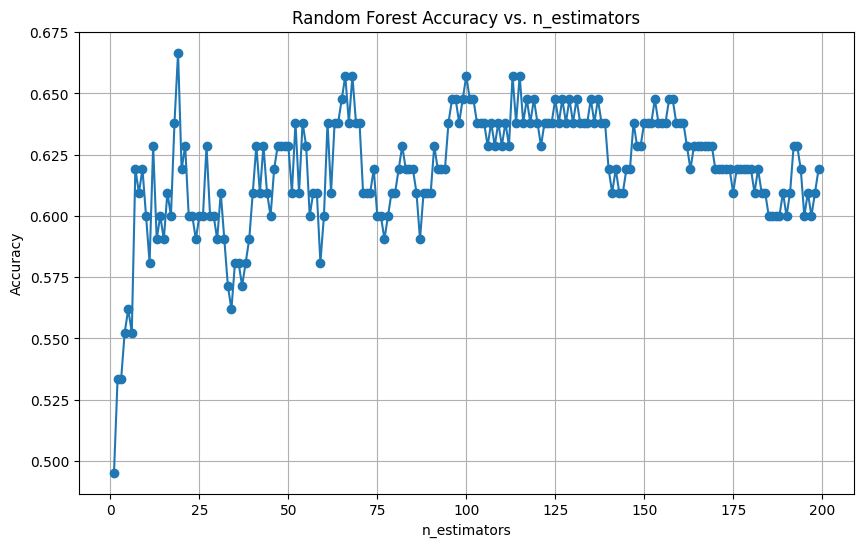

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier

# Reshape the image data
X_train_rf = X_train.reshape(X_train.shape[0], -1)
X_test_rf = X_test.reshape(X_test.shape[0], -1)

# Flatten the image arrays for Random Forest input
X_train_rf = X_train_rf.astype('float32')
X_test_rf = X_test_rf.astype('float32')

# Initialize variables to store results
n_estimators_range = range(1, 200)
accuracies = []

# Loop through different values of n_estimators
for n_estimators in n_estimators_range:
    # Initialize and train the Random Forest classifier
    rf_clf = RandomForestClassifier(n_estimators=n_estimators, random_state=42)
    rf_clf.fit(X_train_rf, y_train)

    # Predict on the test set
    y_pred_rf = rf_clf.predict(X_test_rf)

    # Calculate accuracy
    accuracy_rf = accuracy_score(y_test, y_pred_rf)
    accuracies.append(accuracy_rf)
    print(n_estimators)

# Plotting the graph
plt.figure(figsize=(10, 6))
plt.plot(n_estimators_range, accuracies, marker='o', linestyle='-')
plt.title('Random Forest Accuracy vs. n_estimators')
plt.xlabel('n_estimators')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()


Random Forest Accuracy : 66.67%

In [34]:
from sklearn.ensemble import RandomForestClassifier

# Reshape the image data
X_train_rf = X_train.reshape(X_train.shape[0], -1)
X_test_rf = X_test.reshape(X_test.shape[0], -1)

# Flatten the image arrays for Random Forest input
X_train_rf = X_train_rf.astype('float32')
X_test_rf = X_test_rf.astype('float32')

# Initialize and train the Random Forest classifier
rf_clf = RandomForestClassifier(n_estimators=19, random_state=42)
rf_clf.fit(X_train_rf, y_train)

# Predict on the test set
y_pred_rf = rf_clf.predict(X_test_rf)

# Calculate accuracy
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("Random Forest Test Accuracy:", accuracy_rf)


Random Forest Test Accuracy: 0.6666666666666666


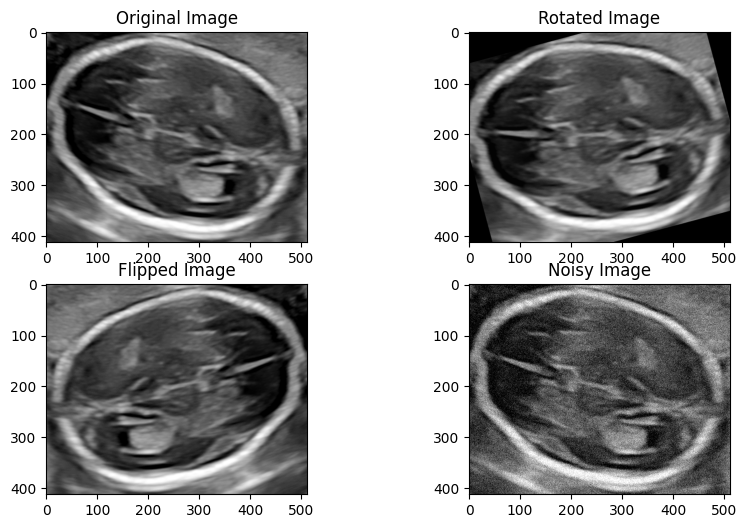

In [35]:
image_path = "C:\\Fetal_Brain\\CroppedImages\\Patient00305_Plane3_1_of_5.png"  # Replace with your image path


In [12]:
import tensorflow as tf
import os
import pandas as pd

# Read the label DataFrame
label_df = pd.read_excel('C:\\Fetal_Brain\\FETAL_PLANES_DB_data.xlsx')
# Read the augmented DataFrame
augmented_df = pd.read_csv('C:\\Fetal_Brain\\AugmentedImages.csv')

def rotate_image(image, angle):
    """Rotate the image by a given angle."""
    rotated_image = tf.image.rot90(image, k=angle // 45)
    return rotated_image

def flip_image(image, flip_code):
    """Flip the image horizontally or vertically."""
    flipped_image = tf.image.flip_left_right(image) if flip_code == 1 else tf.image.flip_up_down(image)
    return flipped_image

# Directory containing images to be augmented
input_dir = "C:\\Fetal_Brain\\CroppedImages\\"
# Directory to save augmented images
save_dir = "C:\\Fetal_Brain\\AugmentedImages\\"

# Create the directory if it doesn't exist
os.makedirs(save_dir, exist_ok=True)

# Augmentation parameters
rotation_angles = range(0, 360, 45)  # Rotate by 45 degrees increments
flip_codes = [0, 1, 2]  # Flip horizontally, vertically, and both

# Iterate over each image in the directory
for image_file in os.listdir(input_dir):
    if image_file.endswith('.png'):
        # Load the image
        image_path = os.path.join(input_dir, image_file)
        image = tf.image.decode_image(tf.io.read_file(image_path), channels=1)
        # Get label for the image
        label = label_df['Train '][label_df['Image_name'] == os.path.basename(image_path).split('.')[0]].values[0]

        # Apply augmentation
        augmented_images = []
        for angle in rotation_angles:
            rotated_image = rotate_image(image, angle)  # Skip resizing here
            for flip_code in flip_codes:
                flipped_image = flip_image(rotated_image, flip_code)
                augmented_images.append(flipped_image)

        # Save augmented images
        for i, augmented_image in enumerate(augmented_images):
            # Convert image to uint8
            augmented_image = tf.image.convert_image_dtype(augmented_image, dtype=tf.uint8)
            # Generate filename
            filename = os.path.basename(image_path).split('.')[0] + f"_augmented_{i}.png"
            # Save image
            tf.io.write_file(os.path.join(save_dir, filename), tf.image.encode_png(augmented_image))
            # Update augmented DataFrame
            augmented_df = augmented_df.append({'Image_name': filename, 'Train': label}, ignore_index=True)

# Save the updated augmented DataFrame
augmented_df.to_csv('C:\\Fetal_Brain\\AugmentedImages.csv', index=False)


C:\Users\itsoh\AppData\Local\Temp\ipykernel_16900\668068932.py:58: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  augmented_df = augmented_df.append({'Image_name': filename, 'Train': label}, ignore_index=True)
C:\Users\itsoh\AppData\Local\Temp\ipykernel_16900\668068932.py:58: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  augmented_df = augmented_df.append({'Image_name': filename, 'Train': label}, ignore_index=True)
C:\Users\itsoh\AppData\Local\Temp\ipykernel_16900\668068932.py:58: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  augmented_df = augmented_df.append({'Image_name': filename, 'Train': label}, ignore_index=True)
C:\Users\itsoh\AppData\Local\Temp\ipykernel_16900\668068932.py:58: FutureWarning: The frame.append method 

In [23]:
import os
import cv2
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Load the preprocessed images and corresponding labels
image_directory = 'C:\\Fetal_Brain\\AugmentedImages'
labels_file = 'C:\\Fetal_Brain\\AugmentedImages.csv'
labels_df = pd.read_csv(labels_file)

# Keep only the 'Image_name' and 'Train' columns
labels_df = labels_df[['Image_name', 'Train']]

# Prepare the data
images = []
labels = []
for filename in os.listdir(image_directory):
    image_path = os.path.join(image_directory, filename)
    if os.path.isfile(image_path):
        image_name = filename.split(".")[0] 
        label_row = labels_df.loc[labels_df['Image_name'] == image_name]
        if not label_row.empty:
            image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)  # Read image in grayscale
            resized_image = cv2.resize(image, (224, 224))
            images.append(resized_image.flatten())
            labels.append(label_row.iloc[0]['Train'])

# Convert lists to numpy arrays
images = np.array(images)
labels = np.array(labels)

    


In [24]:
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)
# Train a Random Forest classifier
rf_classifier = RandomForestClassifier()
rf_classifier.fit(X_train, y_train)
# Predictions
y_pred = rf_classifier.predict(X_test)
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 1.0
